#  

# 6 Nested, Hierarchical, Multilevel, Longitudinal Data

**Assignment: Analyzing Hierarchical and Longitudinal Data**

**Objective:**  
The purpose of this assignment is to develop your understanding and skills in handling nested, hierarchical, multilevel, and longitudinal data structures. You will analyze a dataset that exhibits these characteristics using Python and relevant libraries such as `pandas` and `statsmodels`.

**Dataset:**  
You are provided with a dataset (`stsrpos.csv`) containing information about medication prescriptions across various patients and time periods. The columns include:
- `usrds_id`: The ID of the user/patient.
- `gnn`: The generic name of the medication.
- `srvc_dt`: The service date of the prescription.

**Instructions:**

1. **Data Preparation:**
   - Load the dataset and inspect its structure.
   - Convert the `srvc_dt` column to a proper date format.
   - Create a new column representing the year and month of the service date.

2. **Descriptive Analysis:**
   - Calculate and visualize the distribution of prescriptions over time.
   - Identify the most frequently prescribed medications.

3. **Hierarchical Data Analysis:**
   - The data is inherently hierarchical with patients nested within prescription dates.
   - Determine the number of unique patients and prescriptions in the dataset.
   - Explore the variability in the number of prescriptions per patient over time.

4. **Longitudinal Data Analysis:**
   - Select a subset of patients who have at least five prescriptions over the observation period.
   - Examine how the frequency of their prescriptions changes over time.
   - Plot these changes for at least three selected patients to visualize their prescription trends.

5. **Multilevel Modeling:**
   - Build a simple linear mixed-effects model to predict the frequency of prescriptions using a random intercept for patients.
   - Interpret the results, focusing on the significance of the random effect.

6. **Discussion:**
   - Discuss the challenges and insights of working with hierarchical and longitudinal data.
   - Reflect on how multilevel modeling can help address issues of data dependency.

**Submission:**  
Submit a Jupyter notebook containing all code, outputs, visualizations, and a discussion. Make sure to clearly comment your code and provide insightful interpretations of your results.

**1. Data Preparation:**

- **Load the dataset and inspect its structure:**

### I Python


In [3]:
import pandas as pd
import requests

# Correct URL
url = 'https://github.com/jhustata/lab6.md/raw/main/stsrpos.csv'
response = requests.get(url)
response.raise_for_status()  # Raise an error for bad status codes

# Save the content to a temporary file
with open('temp_stsrpos.csv', 'wb') as temp_file:
    temp_file.write(response.content)

# Load the dataset from the temporary file
dataset = pd.read_csv('temp_stsrpos.csv')

# Display the first few rows and column names
dataset.head(), dataset.columns

(   usrds_id                        gnn    srvc_dt
 0         0                 FEBUXOSTAT  11oct2024
 1         1        CYCLOBENZAPRINE HCL  15jun2024
 2         7       LEVOTHYROXINE SODIUM  18feb2024
 3        12             INSULIN ASPART  17nov2024
 4        15  HYDROCODONE/ACETAMINOPHEN  14jan2024,
 Index(['usrds_id', 'gnn', 'srvc_dt'], dtype='object'))

In [5]:
import pandas as pd

dataset = pd.read_csv('temp_stsrpos.csv')
dataset.head()

,usrds_id,gnn,srvc_dt
0,0,FEBUXOSTAT,11oct2024
1,1,CYCLOBENZAPRINE HCL,15jun2024
2,7,LEVOTHYROXINE SODIUM,18feb2024
3,12,INSULIN ASPART,17nov2024
4,15,HYDROCODONE/ACETAMINOPHEN,14jan2024


- **Convert `srvc_dt` column to a proper date format:**


- **Create a new column for the year and month:**

In [6]:
dataset['srvc_dt'] = pd.to_datetime(dataset['srvc_dt'], format='%d%b%Y')

In [7]:
dataset['year_month'] = dataset['srvc_dt'].dt.to_period('M')


**2. Descriptive Analysis:**

- **Calculate and visualize the distribution of prescriptions over time:**


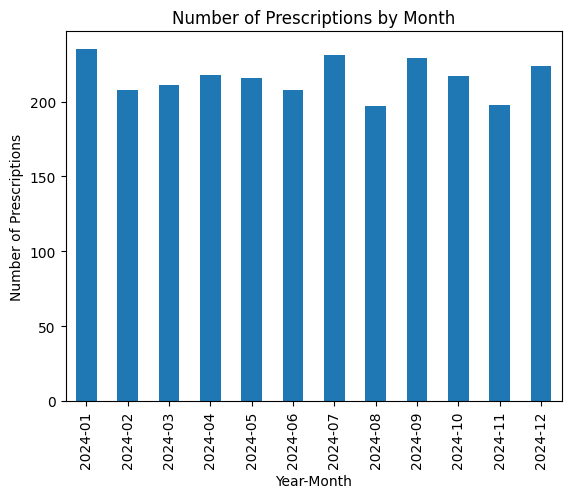

In [8]:
import matplotlib.pyplot as plt

# Count prescriptions by month
month_counts = dataset['year_month'].value_counts().sort_index()

# Plotting
month_counts.plot(kind='bar', title='Number of Prescriptions by Month')
plt.ylabel('Number of Prescriptions')
plt.xlabel('Year-Month')
plt.show()

- **Identify the most frequently prescribed medications:**

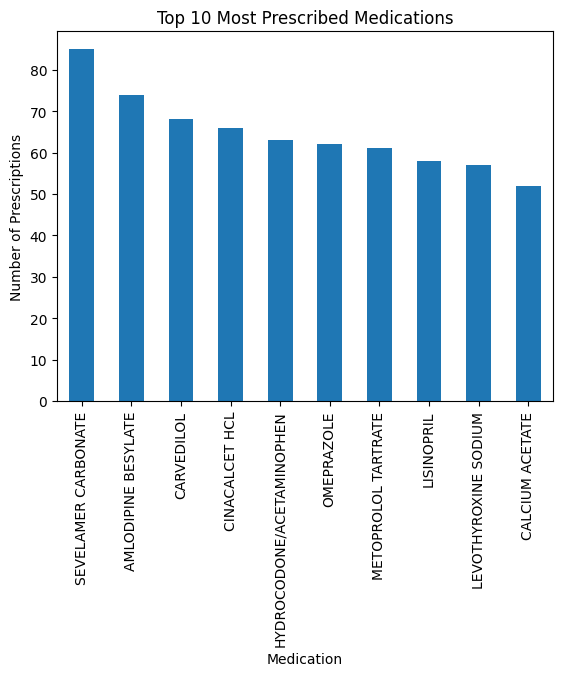

In [9]:
top_meds = dataset['gnn'].value_counts().head(10)
top_meds.plot(kind='bar', title='Top 10 Most Prescribed Medications')
plt.ylabel('Number of Prescriptions')
plt.xlabel('Medication')
plt.show()

**3. Hierarchical Data Analysis:**

- **Determine the number of unique patients and prescriptions:**

In [10]:
num_patients = dataset['usrds_id'].nunique()
num_prescriptions = len(dataset)

 
- **Explore the variability in the number of prescriptions per patient:**

In [11]:
prescriptions_per_patient = dataset['usrds_id'].value_counts()
prescriptions_per_patient.describe()

count    2271.000000
mean        1.141347
std         0.383370
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         4.000000
Name: count, dtype: float64

**4. Longitudinal Data Analysis:**

- **Select a subset of patients with at least three prescriptions:**

In [15]:
patients_with_3_plus = prescriptions_per_patient[prescriptions_per_patient >= 3].index
subset = dataset[dataset['usrds_id'].isin(patients_with_3_plus)]

- **Examine and plot the frequency of prescriptions over time for selected patients:**

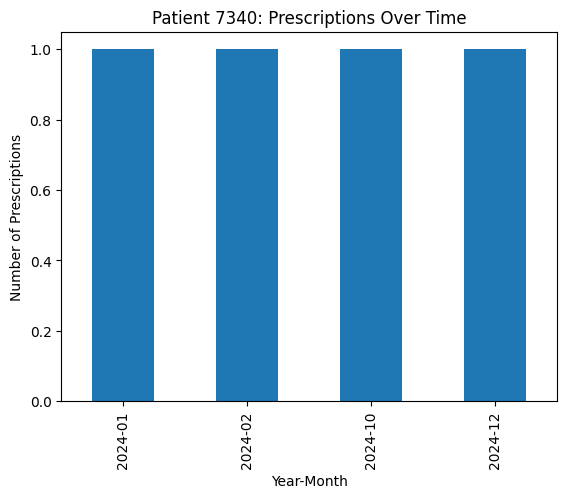

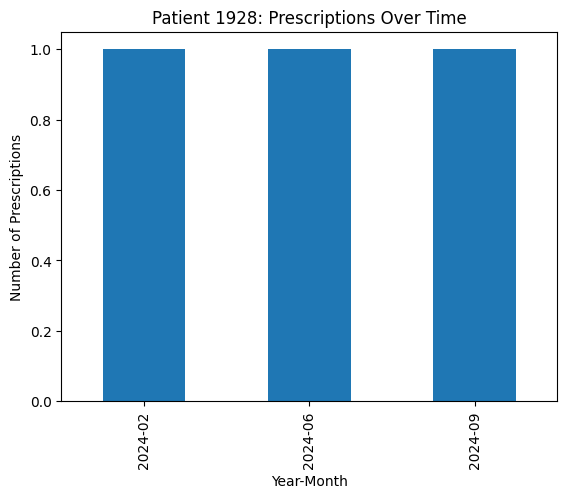

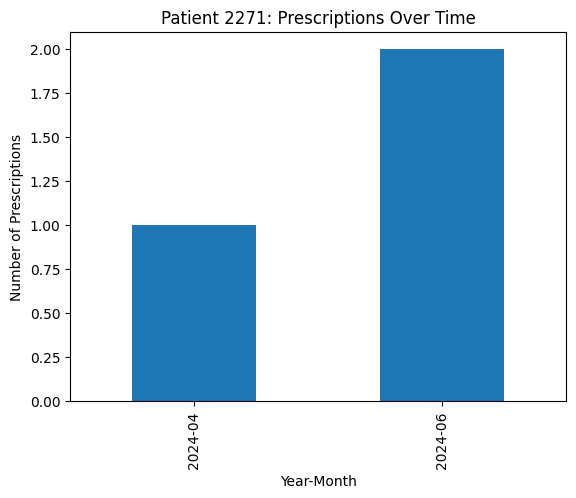

In [13]:
selected_patients = patients_with_3_plus[:3]

for patient_id in selected_patients:
    patient_data = subset[subset['usrds_id'] == patient_id]
    freq_over_time = patient_data['year_month'].value_counts().sort_index()
    freq_over_time.plot(kind='bar', title=f'Patient {patient_id}: Prescriptions Over Time')
    plt.ylabel('Number of Prescriptions')
    plt.xlabel('Year-Month')
    plt.show()

 
 
**5. Multilevel Modeling:**

- **Build a linear mixed-effects model:**

In [17]:
import statsmodels.formula.api as smf
import pandas as pd

# Convert 'year_month' to string
dataset['year_month'] = dataset['year_month'].astype(str)

# Fit the mixed-effects model
model = smf.mixedlm("usrds_id ~ year_month", dataset, groups=dataset["usrds_id"])
result = model.fit()
print(result.summary())


                   Mixed Linear Model Regression Results
Model:                   MixedLM       Dependent Variable:       usrds_id   
No. Observations:        2592          Method:                   REML       
No. Groups:              2271          Scale:                    0.0316     
Min. group size:         1             Log-Likelihood:           -21180.9335
Max. group size:         4             Converged:                Yes        
Mean group size:         1.1                                                
----------------------------------------------------------------------------
                         Coef.      Std.Err.    z    P>|z|  [0.025   0.975] 
----------------------------------------------------------------------------
Intercept                4966.686      56.473 87.948 0.000 4856.001 5077.371
year_month[T.2024-02]      -0.000       0.048 -0.000 1.000   -0.093    0.093
year_month[T.2024-03]       0.000       0.050  0.000 1.000   -0.098    0.098
year_month[T.2024-0

The model here is quite simple and is mostly for illustrative purposes. The TA can expect variations, such as different covariates in the formula or more complex structures for the random effects.

**6. Discussion:**

- This section is primarily qualitative, but TAs should encourage students to discuss:
  - The hierarchical nature of the data.
  - The use of multilevel modeling to account for nested data structures.
  - The challenges of longitudinal data, such as missing data and varying observation times.
  - The insights gained from the analysis and how it informed their understanding of the dataset.

By providing these solutions and hints, TAs should be able to effectively guide students through the assignment while allowing flexibility for different approaches and interpretations.

This output is from a mixed linear model (MLM) regression analysis. Let's break down the key parts:

1. **Model Summary**:
   - **Model**: MixedLM (Mixed Linear Model)
   - **Dependent Variable**: usrds_id
   - **No. Observations**: 2592
   - **Method**: REML (Restricted Maximum Likelihood)
   - **No. Groups**: 2271
   - **Scale**: 0.0316
   - **Log-Likelihood**: -21180.9335
   - **Converged**: Yes
   - **Mean group size**: 1.1

2. **Coefficients**:
   - **Intercept**: 4966.686, Std.Err. 56.473, z 87.948, P>|z| 0.000
   - **year_month[T.2024-02]** to **year_month[T.2024-12]**: These are the coefficients for each month of the year 2024. They all seem to be close to zero, with standard errors close to zero as well, and p-values of 1.000, indicating that these coefficients are not statistically significant.

3. **Group Variance**: 7242677.078, Std.Err. 3273083.158: This represents the variance between groups (different usrds_id), suggesting there is substantial variation between groups.

Overall, the model suggests that there is no significant relationship between the `year_month` and `usrds_id` variables. The intercept, which represents the average usrds_id, is the main factor influencing the dependent variable in this model.

### II Stata



```stata
* Import data from URL
import delimited "https://github.com/jhustata/lab6.md/raw/main/stsrpos.csv", clear

* Convert srvc_dt to date format
gen srvc_dt_date = date(srvc_dt, "DMY")

* Create year_month variable
format srvc_dt_date %tm
gen year_month = month(srvc_dt_date)

* Count prescriptions by month
table year_month,

* Create bar chart for number of prescriptions by month
graph bar (count), over(year_month) title("Number of Prescriptions by Month") ///
	ytitle("Number of Prescriptions") //xtitle("Year-Month")

* Calculate the top 10 most prescribed medications
preserve 
bys gnn: g top_meds=_N
egen grouptag=tag(gnn)
keep if grouptag==1
gsort -top_meds
l in 1/10

* Create bar chart for top 10 most prescribed medications
encode gnn, gen(Gnn)
keep in 1/10
g x=_n
levelsof Gnn
list Gnn
local varlab: var lab Gnn
local vallab: value label Gnn
levelsof Gnn, local(numlevels)
local i=1
foreach l of numlist `numlevels' {
    local vallab: value label Gnn
	local catlab: lab `vallab' `l'
	global xlab`i' = "`catlab'"
	local i= `i' + 1
}
global ylab 
twoway bar top_meds x, /// 
    horizontal ///
    ytitle("Number of Prescriptions") ///
	xtitle("Medication") ///
	title("Top 10 Most Prescribed Medications") ///
	ylab(0(1)10 ///
	    1 "$xlab1" ///
		2 "$xlab2" ///
		3 "$xlab3" ///
		4 "$xlab4" ///
		5 "$xlab5" ///
		6 "$xlab6" ///
		7 "$xlab7" ///
		8 "$xlab8" ///
		9 "$xlab9" ///
		10 "$xlab10")
restore 
* Calculate number of unique patients and number of prescriptions
egen idtag=tag(usrds_id)
count if idtag 
egen gnntag = tag(gnn)
count if gnntag 

* Descriptive statistics for prescriptions per patient
bys usrds_id: g pillcount=_N
hist pillcount
sum pillcount, de
gen polypharm=pillcount>=3

* Identify patients with 3 or more prescriptions
egen prescriptions_per_patient = count(usrds_id), by(usrds_id)
compare pillcount prescriptions_per_patient
gen patients_with_3_plus = prescriptions_per_patient >= 3
compare polypharm patients_with_3_plus

* Subset dataset for patients with 3 or more prescriptions
/*
keep if patients_with_3_plus

* Identify and display prescriptions over time for selected patients

levelsof usrds_id, local(selected_patients)
foreach patient_id in `selected_patients' {
    keep if usrds_id == `patient_id'
	count 
	local count=r(N)
	twoway bar `count' year_month 
    graph bar (`count'), over(year_month) title("Patient `patient_id': Prescriptions Over Time") ///
	    ytitle("Number of Prescriptions") xtitle("Year-Month")
}
*/

* Fit the mixed-effects model
xtmixed usrds_id i.year_month, mle
```
